Import necessary ***libraries***

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset

In [10]:
df = pd.read_csv('./sample_data/dataset.csv')

Check the first few rows of the dataset to understand its structure

In [11]:
df.head()

,Total number of pregnant women Registered for ANC,Number of Pregnant women registered within first trimester,Number of pregnant women received 3 ANC check ups,TT2 or Booster given to Pregnant women (numbers),Number of Pregnant women given 100 IFA tablets,Number having Hb level<11 (tested cases),Number having severe anaemia (Hb<7) treated at institution,Number of Home deliveries,Number of home deliveries attended by SBA trained (Doctor/Nurse/ANM),Number of home deliveries attended by Non SBA trained (trained TB/Dai),...,Adverse Events Following Imunisation (Others),Number of Major Operations,Number of Minor Operations,Total Number of Infant Deaths reported,Population Persons,Literate Persons,Main workers Persons,Marginal workers Persons,Non-workers Persons,Total Number of reported live births
0,2253.0,739.0,2007.0,1667.0,7857.0,3496.0,34.0,350.0,123.0,227.0,...,0.0,29.0,54.0,22.0,0,0,0,0,0,1627.0
1,925.0,247.0,638.0,584.0,1230.0,4459.0,214.0,39.0,29.0,10.0,...,5.0,106.0,220.0,24.0,37333,25449,9936,7392,19974,585.0
2,1511.0,611.0,1491.0,1097.0,2674.0,2715.0,192.0,216.0,89.0,127.0,...,11.0,0.0,17.0,15.0,0,0,0,0,0,1095.0
3,1043.0,278.0,554.0,485.0,1413.0,3926.0,335.0,62.0,52.0,10.0,...,46.0,116.0,191.0,11.0,36842,25331,9650,7473,19717,484.0
4,1279.0,896.0,1255.0,1115.0,1397.0,1509.0,36.0,190.0,76.0,114.0,...,45.0,0.0,40.0,15.0,0,0,0,0,0,927.0


Check for missing values

In [12]:
df.isnull().sum()

Total number of pregnant women Registered for ANC                             0
Number of Pregnant women registered within first trimester                    0
Number of pregnant women received 3 ANC check ups                             0
TT2 or Booster given to Pregnant women (numbers)                              0
Number of Pregnant women given 100 IFA tablets                                0
Number having Hb level<11 (tested cases)                                      0
Number having severe anaemia (Hb<7) treated at institution                    0
Number of Home deliveries                                                     0
Number of home deliveries attended by SBA trained (Doctor/Nurse/ANM)          0
Number of home deliveries attended by Non SBA trained (trained TB/Dai)        0
Deliveries Conducted at Public Institutions                                   0
Number of Women Discharged under 48 hours of delivery in public facilities    0
Institutional deliveries (Public Insts.+

Handle missing values

In [13]:
df.fillna(df.median(), inplace=True)

Check for duplicate rows and drop them if any

In [14]:
df.drop_duplicates(inplace=True)

Rename columns with more descriptive names if necessary

In [15]:
df.rename(columns={'Total number of pregnant women': 'PregnantWomenTotal'}, inplace=True)

Create new features from existing columns if needed. For example, you can create a column for the percentage of home deliveries

In [16]:
df['HomeDeliveriesPercentage'] = (df['Number of Home deliveries'] / df['Total reported deliveries']) * 100

Analyze the data to answer constructive questions. For example, find the percentage of C-section deliveries in public facilities

In [17]:
public_c_section_percentage = (df['Number of C-section deliveries conducted at public facilities'].sum() / df['Total reported deliveries'].sum()) * 100

Prepare visualizations using Matplotlib and Seaborn libraries. For example, plot the correlation between various columns

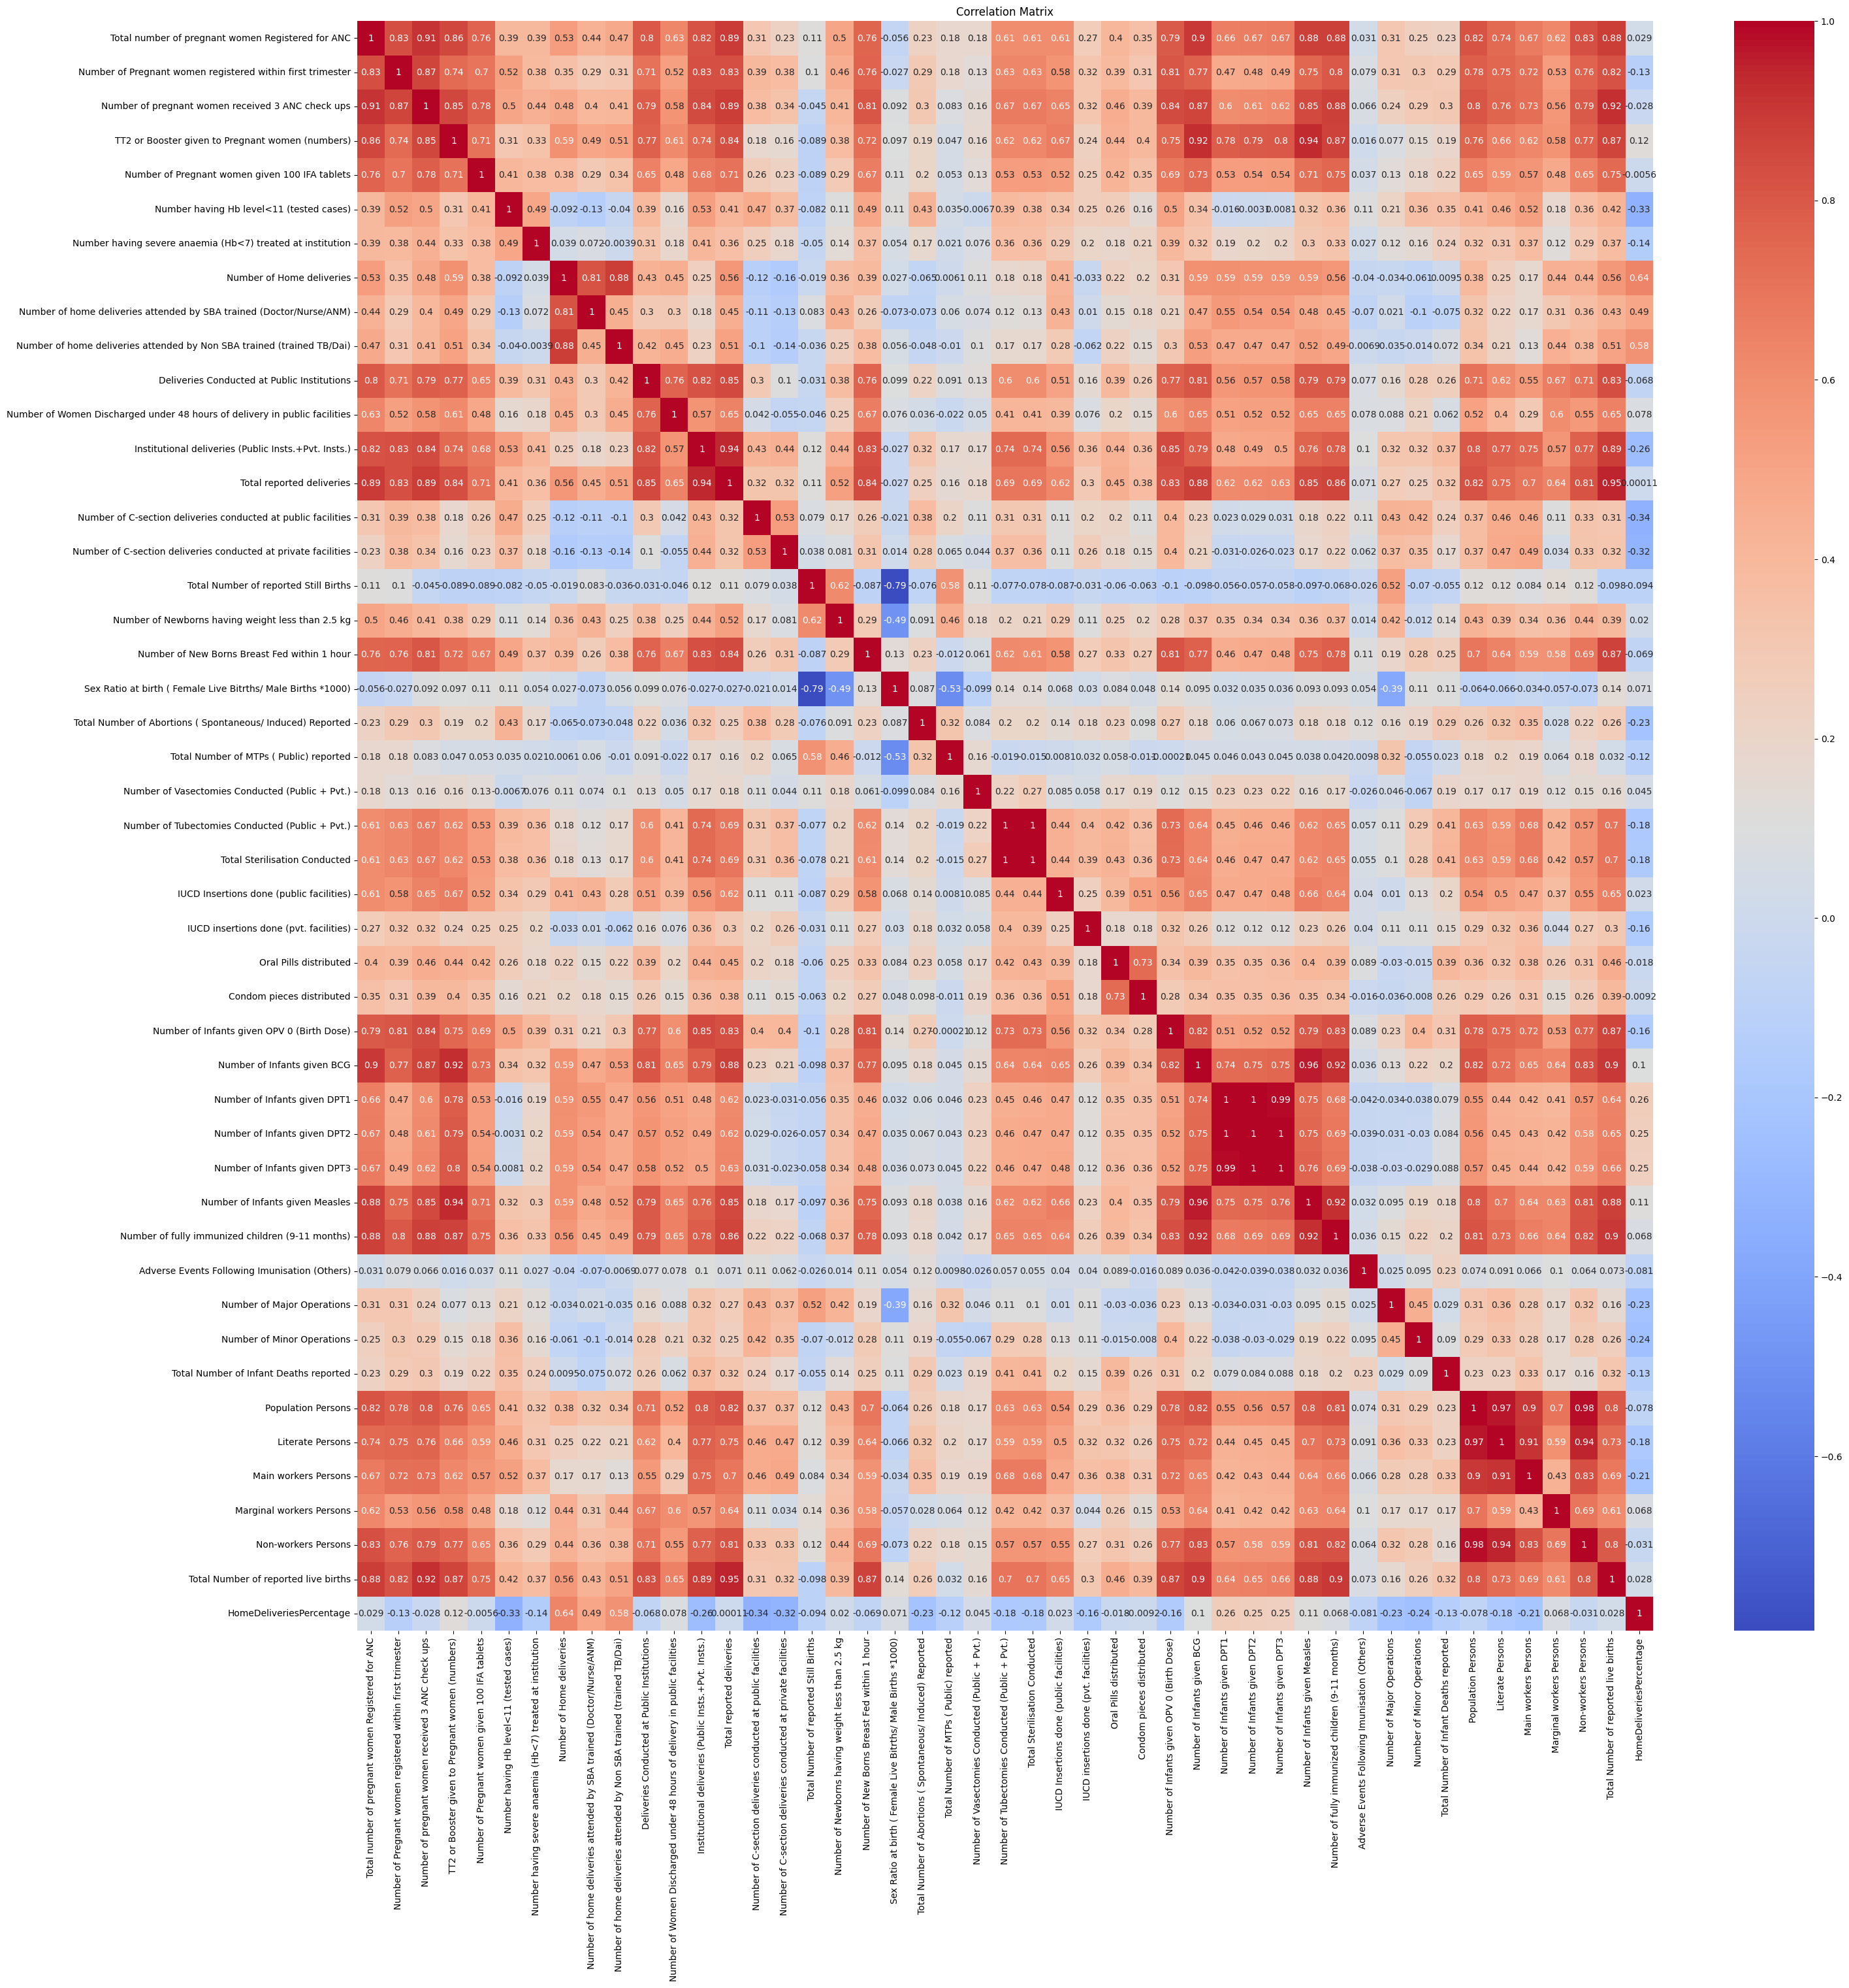

In [18]:
plt.figure(figsize=(32, 32))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Import necessary ***libraries***

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

This code creates a new DataFrame called df_linear that includes four columns from the original DataFrame df: 'Total Number of Infant Deaths reported', 'Total reported deliveries', 'Number of Pregnant women given 100 IFA tablets', and 'Number of fully immunized children (9-11 months)'. These columns are selected because they are considered relevant features for predicting the number of infant deaths.

The first column, 'Total Number of Infant Deaths reported', is the target variable that we want to predict. The other three columns are the input variables that we will use to train our linear regression model.

By selecting these specific columns from the original DataFrame and creating a new DataFrame with them, we can easily separate our input and target variables when we split the data into training and testing sets, and when we train and evaluate our linear regression model.

In [20]:
df_linear = df[['Total Number of Infant Deaths reported', 'Total reported deliveries', 'Number of Pregnant women given 100 IFA tablets', 'Number of fully immunized children (9-11 months)']]

This code separates the input features and target variable for the linear regression model we will be training.

The df_linear DataFrame we created earlier includes the target variable 'Total Number of Infant Deaths reported' and the input features 'Total reported deliveries', 'Number of Pregnant women given 100 IFA tablets', and 'Number of fully immunized children (9-11 months)'.

The first line of code, X_linear = df_linear.drop('Total Number of Infant Deaths reported', axis=1), creates a new DataFrame X_linear that includes all the columns from df_linear except for 'Total Number of Infant Deaths reported'. This new DataFrame contains only the input features that we will use to train the linear regression model.

The second line of code, y_linear = df_linear['Total Number of Infant Deaths reported'], creates a new Series y_linear that contains only the target variable 'Total Number of Infant Deaths reported'. This will be the variable we will try to predict using the input features in X_linear.

In [21]:
X_linear = df_linear.drop('Total Number of Infant Deaths reported', axis=1)
y_linear = df_linear['Total Number of Infant Deaths reported']

This code splits the input features and target variable into training and testing sets, which we will use to train and evaluate our linear regression model.

The train_test_split() function from the sklearn library is used to split the data into random training and testing subsets. The input features X_linear and target variable y_linear are passed as the first two arguments to the function. The test_size parameter is set to 0.2, which means that 20% of the data will be used for testing and 80% will be used for training. The random_state parameter is set to 42, which ensures that the random splitting is reproducible.

The function returns four subsets of data: X_train_linear, X_test_linear, y_train_linear, and y_test_linear. The training subsets (X_train_linear and y_train_linear) will be used to train our linear regression model, while the testing subsets (X_test_linear and y_test_linear) will be used to evaluate the model's performance on unseen data.

In [22]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

This code creates a new instance of the LinearRegression class and fits the model to the training data.

The LinearRegression class is provided by the sklearn library and implements a linear regression algorithm. The fit() method of the LinearRegression class takes two arguments: the input features X_train_linear and the target variable y_train_linear. This method fits the linear regression model to the training data by finding the coefficients for the input features that minimize the sum of squared errors between the predicted and actual values of the target variable.

After the model has been fit to the training data, it can be used to make predictions on new data using the predict() method.

In [23]:
linear_model = LinearRegression()
linear_model.fit(X_train_linear, y_train_linear)

LinearRegression()

This code generates predictions for the target variable using the trained linear regression model and the testing input features.

The predict() method of the LinearRegression class takes one argument: the input features for which we want to generate predictions, which in this case are the testing input features X_test_linear. This method returns an array of predicted values for the target variable based on the input features.

The predicted values y_pred_linear can be compared to the actual values y_test_linear to evaluate the performance of the linear regression model on the testing data.

In [24]:
y_pred_linear = linear_model.predict(X_test_linear)

This code calculates the mean squared error (MSE) between the actual and predicted values of the target variable for the linear regression model.

The mean_squared_error() function from the sklearn.metrics library is used to calculate the MSE. The function takes two arguments: the actual values of the target variable y_test_linear, and the predicted values of the target variable y_pred_linear. The function returns a single value representing the MSE between the two arrays.

The MSE measures the average squared difference between the predicted and actual values of the target variable. Lower values of MSE indicate better performance of the linear regression model on the testing data.

In [25]:
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
print(f"Mean Squared Error: {mse_linear}")

Mean Squared Error: 89043.31069156971


Creates a new column in the df DataFrame called 'CSection', which indicates whether a delivery was a C-section or not based on the proportion of C-section deliveries at public and private facilities.

The formula (df['Number of C-section deliveries conducted at public facilities'] + df['Number of C-section deliveries conducted at private facilities']) / df['Total reported deliveries'] calculates the proportion of C-section deliveries out of all reported deliveries.

The comparison > 0.5 checks whether this proportion is greater than 0.5 (i.e. more than half of all deliveries are C-sections). If the comparison is true, the corresponding value in the 'CSection' column is set to True, indicating that the delivery was a C-section. Otherwise, the value is set to False, indicating that the delivery was not a C-section.

This new column can be used as the target variable for logistic regression to predict whether a delivery was a C-section or not based on other features in the dataset.

In [26]:
df['CSection'] = ((df['Number of C-section deliveries conducted at public facilities'] + df['Number of C-section deliveries conducted at private facilities']) / df['Total reported deliveries']) > 0.5

[link text](https://)

In [27]:
df_logistic = df[['CSection', 'Number of Pregnant women given 100 IFA tablets', 'Number of fully immunized children (9-11 months)']]

In [28]:
X_logistic = df_logistic.drop('CSection', axis=1)
y_logistic = df_logistic['CSection']

In [29]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)

In [30]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

LogisticRegression()

In [31]:
y_pred_logistic = logistic_model.predict(X_test_logistic)

In [32]:
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
confusion_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
classification_report_logistic = classification_report(y_test_logistic, y_pred_logistic)

print(f"Accuracy: {accuracy_logistic}")
print(f"Confusion Matrix:\n{confusion_matrix_logistic}")

Accuracy: 0.9731182795698925
Confusion Matrix:
[[1086    0]
 [  30    0]]


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


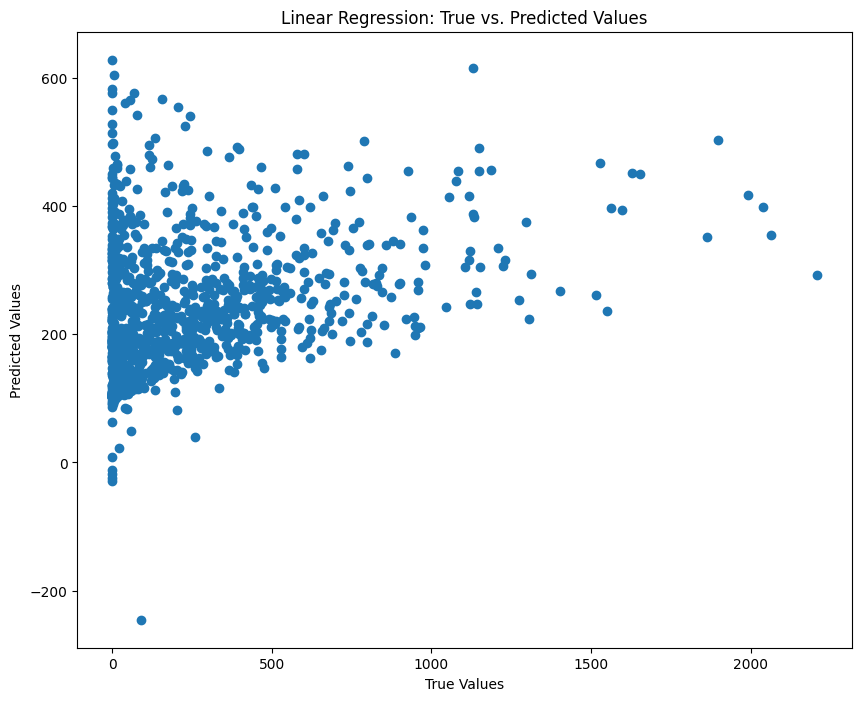

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test_linear, y_pred_linear)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs. Predicted Values")
plt.show()